In [1]:
#1
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#2
#importing data with read_json
df = pd.read_json("modcloth_final_data.json", lines = True)


In [3]:
df.head()

item_id  waist  size  quality cup size  hips  bra size category bust  \
0   123373   29.0     7      5.0        d  38.0      34.0      new   36   
1   123373   31.0    13      3.0        b  30.0      36.0      new  NaN   
2   123373   30.0     7      2.0        b   NaN      32.0      new  NaN   
3   123373    NaN    21      5.0     dd/e   NaN       NaN      new  NaN   
4   123373    NaN    18      5.0        b   NaN      36.0      new  NaN   

    height         user_name         length    fit  user_id  shoe size  \
0  5ft 6in             Emily     just right  small   991571        NaN   
1  5ft 2in  sydneybraden2001     just right  small   587883        NaN   
2  5ft 7in             Ugggh  slightly long  small   395665        9.0   
3      NaN      alexmeyer626     just right    fit   875643        NaN   
4  5ft 2in        dberrones1  slightly long  small   944840        NaN   

  shoe width review_summary review_text  
0        NaN            NaN         NaN  
1        NaN            NaN         NaN  
2        NaN            NaN         NaN  
3        NaN            NaN         NaN  
4        NaN            NaN         NaN

In [4]:
df['review_text']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4                                                      NaN
                               ...                        
82785                                         Cute jacket!
82786    It's a beautiful jacket. I love how it's knit ...
82787    I love this blazer. It is a great office piece...
82788    I love this blazer!! I wore it yesterday and g...
82789         I love this piece. I'm really happy with it!
Name: review_text, Length: 82790, dtype: object

In [5]:
#3
#some of the column names are separated using spaces replacing spaces with underscore for avoiding any confusion later on
df.columns = [x.replace(" ","_") for x in df.columns]

In [6]:
print(len(df.user_id.unique()))
print(len(df.user_name.unique()))

47958
32429


In [7]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')

In [8]:
df.isna().sum()

item_id               0
waist             79908
size                  0
quality              68
cup_size           6255
hips              26726
bra_size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe_size         54875
shoe_width        64183
review_summary     6725
review_text        6725
dtype: int64

In [9]:
#4
#percentage of missing values in the dataframe
pd.DataFrame({'missing data percentage': (df.isna().sum()/len(df)) * 100, 'total': df.isna().sum()})

missing data percentage  total
item_id                        0.000000      0
waist                         96.518903  79908
size                           0.000000      0
quality                        0.082136     68
cup_size                       7.555260   6255
hips                          32.281677  26726
bra_size                       7.268994   6018
category                       0.000000      0
bust                          85.681846  70936
height                         1.337118   1107
user_name                      0.000000      0
length                         0.042276     35
fit                            0.000000      0
user_id                        0.000000      0
shoe_size                     66.282160  54875
shoe_width                    77.525063  64183
review_summary                 8.122962   6725
review_text                    8.122962   6725

In [10]:
df[df['category'] == 'new']

item_id  waist  size  quality cup_size  hips  bra_size category bust  \
0       123373   29.0     7      5.0        d  38.0      34.0      new   36   
1       123373   31.0    13      3.0        b  30.0      36.0      new  NaN   
2       123373   30.0     7      2.0        b   NaN      32.0      new  NaN   
3       123373    NaN    21      5.0     dd/e   NaN       NaN      new  NaN   
4       123373    NaN    18      5.0        b   NaN      36.0      new  NaN   
...        ...    ...   ...      ...      ...   ...       ...      ...  ...   
78260   779640    NaN    15      3.0        b   NaN      36.0      new  NaN   
78261   779640    NaN     8      2.0        c  42.0      34.0      new  NaN   
78262   779640    NaN    26      5.0        d  30.0      38.0      new  NaN   
78263   779640    NaN    12      5.0        c  36.0      36.0      new  NaN   
78264   779640    NaN     8      4.0     dd/e  39.0      32.0      new  NaN   

        height         user_name         length    fit  user_id  shoe_size  \
0      5ft 6in             Emily     just right  small   991571        NaN   
1      5ft 2in  sydneybraden2001     just right  small   587883        NaN   
2      5ft 7in             Ugggh  slightly long  small   395665        9.0   
3          NaN      alexmeyer626     just right    fit   875643        NaN   
4      5ft 2in        dberrones1  slightly long  small   944840        NaN   
...        ...               ...            ...    ...      ...        ...   
78260  5ft 7in       k_curry1901  slightly long    fit   236717        NaN   
78261  5ft 2in    sarahjlockwood  slightly long    fit   148905        8.0   
78262  5ft 9in     jacqualann123     just right    fit   766151        NaN   
78263  5ft 9in            Jessie     just right    fit   458485       10.5   
78264  5ft 9in        lannagramm     just right  large   755887        8.0   

      shoe_width             review_summary  \
0            NaN                        NaN   
1            NaN                        NaN   
2            NaN                        NaN   
3            NaN                        NaN   
4            NaN                        NaN   
...          ...                        ...   
78260        NaN  I am a large in everythin   
78261       wide  Cute, but doesn't seem to   
78262        NaN   I really like this coat.   
78263       wide  The fabric is thin but no   
78264        NaN  Love this jacket. Light w   

                                             review_text  
0                                                    NaN  
1                                                    NaN  
2                                                    NaN  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
78260  I am a large in everything on modcloth but dec...  
78261  Cute, but doesn't seem to be special enough to...  
78262  I really like this coat. I was on the fence ab...  
78263  The fabric is thin but not in a cheap way, mor...  
78264  Love this jacket. Light weight but good qualit...  

[21488 rows x 18 columns]

In [11]:
#5
#to check for the outliers we can see the quartiles values if there is much diff then we can tell that there are outliers
#as we can see in shoe_size col the min value is 5 and max vale is 38
df.describe()

item_id        waist          size       quality          hips  \
count   82790.000000  2882.000000  82790.000000  82722.000000  56064.000000   
mean   469325.229170    31.319223     12.661602      3.949058     40.358501   
std    213999.803314     5.302849      8.271952      0.992783      5.827166   
min    123373.000000    20.000000      0.000000      1.000000     30.000000   
25%    314980.000000    28.000000      8.000000      3.000000     36.000000   
50%    454030.000000    30.000000     12.000000      4.000000     39.000000   
75%    658440.000000    34.000000     15.000000      5.000000     43.000000   
max    807722.000000    50.000000     38.000000      5.000000     60.000000   

           bra_size        user_id     shoe_size  
count  76772.000000   82790.000000  27915.000000  
mean      35.972125  498849.564718      8.145818  
std        3.224907  286356.969459      1.336109  
min       28.000000       6.000000      5.000000  
25%       34.000000  252897.750000      7.000000  
50%       36.000000  497913.500000      8.000000  
75%       38.000000  744745.250000      9.000000  
max       48.000000  999972.000000     38.000000

In [12]:
len(df.user_id.unique())

47958

In [13]:
#6
#shoe_size has a single oulier which is replaced with none
df[df['shoe_size'] == 38]

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498       38.0    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [14]:
#7
df.at[37313, 'shoe_size'] = None
df[df['user_id'] == 237498]

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [15]:
len(df.item_id.unique())

1378

<function matplotlib.pyplot.show(close=None, block=None)>

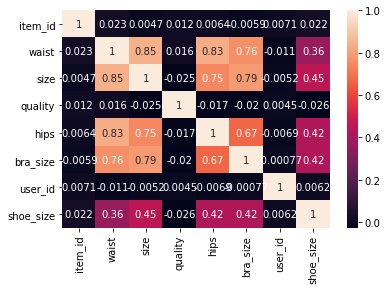

In [16]:
#8
#we ploted a heatmap to check the correlation
#size and waist are highly correlated, so waist is removed
# we can see that bra_size and size are also highly correlated
corr_mat = df.corr()
sns.heatmap(corr_mat, annot = True)
plt.show

# Data cleaning and pre-processing

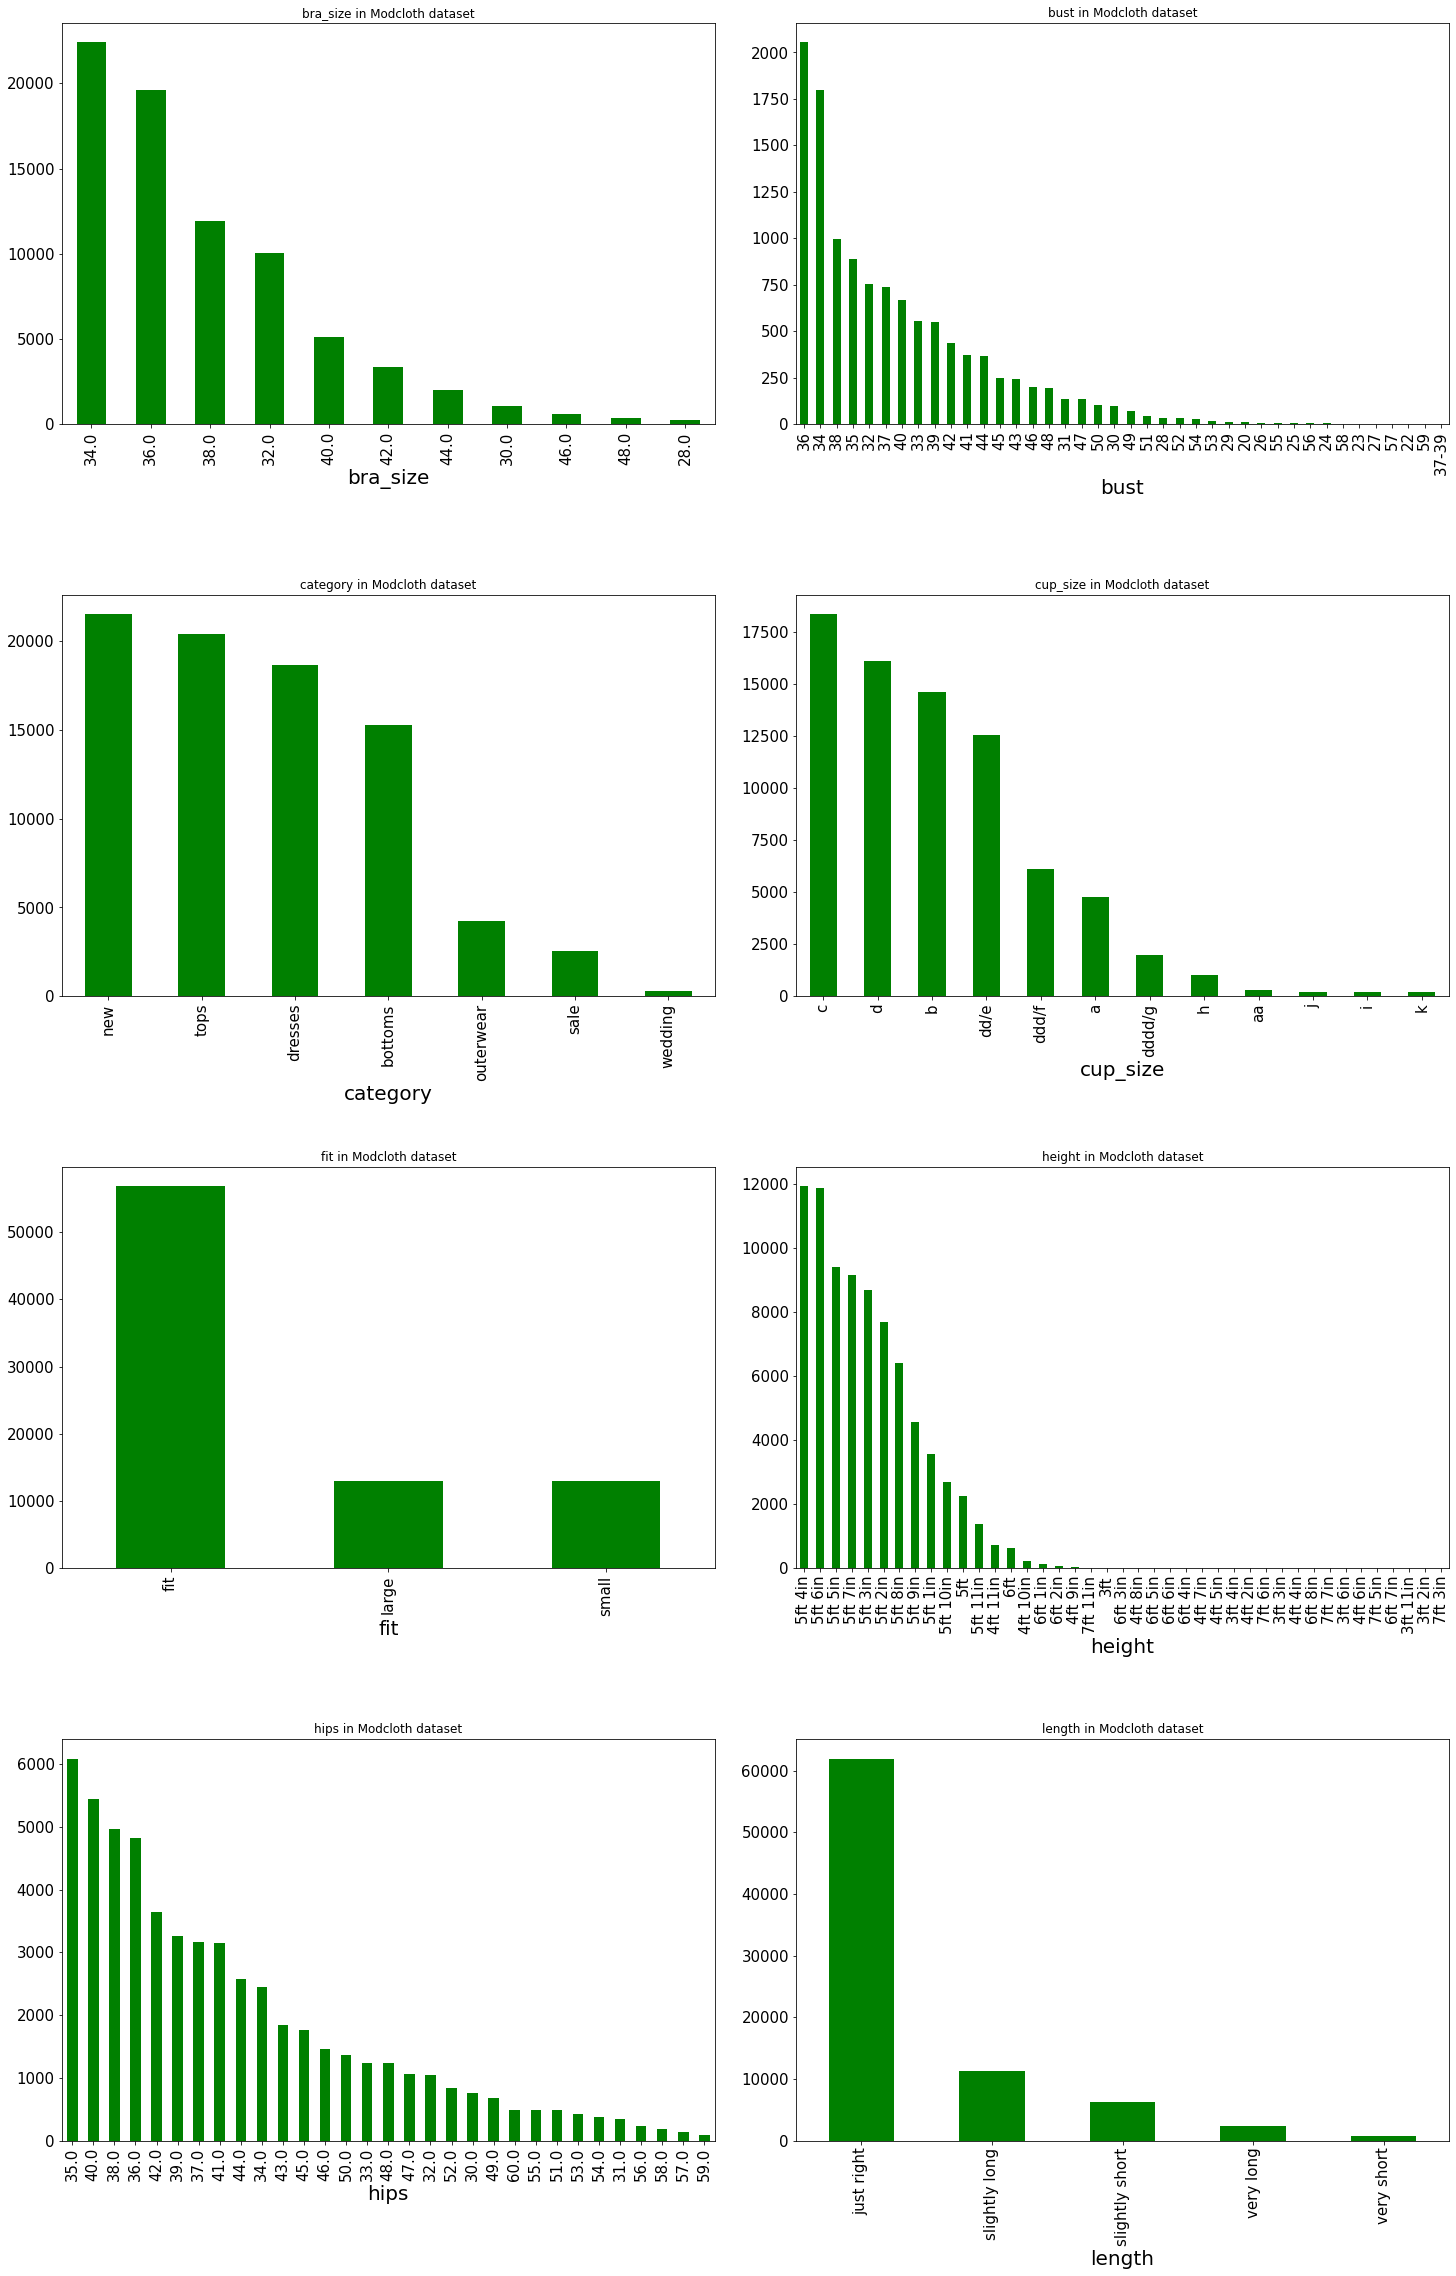

In [17]:
#8
#we plotted some bar graphs for columns
#it shows the frequency of the values in the rows for specific columns
def plot_bargraphs(col, ax):
    df[col][df[col].notnull()].value_counts().plot(kind = 'bar', facecolor = 'g', ax = ax, fontsize = 15)
    ax.set_xlabel("{}".format(col), fontsize = 20)
    ax.set_title("{} in Modcloth dataset".format(col))
    return ax

fig, axes = plt.subplots(4, 2, figsize = (20, 30))
fig.tight_layout(h_pad = 15, w_pad = 5)
#to adjust the padding b/w and around subplots
#padding: gaps b/w 2 subplots
cols = ['bra_size', 'bust', 'category', 'cup_size', 'fit', 'height', 'hips', 'length', 'qualilty']
k = 0

for i in range(4):
    for j in range(2):
        plot_bargraphs(cols[k], axes[i][j])
        k += 1
        
plt.show()

In [18]:
#9
#here in bust_size we have a range that is 37-39
#we replaced that we that average of value of 37 and 39
df.bust.unique()

array(['36', nan, '39', '34', '43', '35', '38', '33', '40', '41', '44',
       '45', '37', '30', '32', '42', '48', '46', '51', '25', '31', '26',
       '52', '22', '50', '47', '56', '58', '49', '54', '55', '53', '27',
       '28', '29', '20', '57', '23', '37-39', '24', '59'], dtype=object)

In [19]:
df[df['bust'] == '37-39']

item_id  waist  size  quality cup_size  hips  bra_size category   bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new  37-39   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [20]:
df.at[37313, 'bust'] = statistics.mean([37, 39])
df[df['user_id'] == 237498]

item_id  waist  size  quality cup_size  hips  bra_size category bust  \
37313   416942   35.0    12      5.0        d  46.0      36.0      new   38   

        height   user_name      length  fit  user_id  shoe_size shoe_width  \
37313  5ft 5in  Catslittle  just right  fit   237498        NaN    average   

                              review_summary  \
37313  Cardigans are best item Mod Cloth has   

                                             review_text  
37313  I love these cardigans, my favorite, good fabr...

In [21]:
df['height'].unique()

array(['5ft 6in', '5ft 2in', '5ft 7in', nan, '5ft 4in', '5ft 3in',
       '5ft 5in', '5ft 10in', '5ft 8in', '5ft', '5ft 9in', '5ft 1in',
       '5ft 11in', '4ft 11in', '4ft 10in', '6ft', '3ft 4in', '4ft 9in',
       '6ft 3in', '6ft 1in', '6ft 2in', '3ft', '4ft 7in', '4ft 4in',
       '7ft 11in', '4ft 2in', '6ft 6in', '4ft 8in', '6ft 4in', '3ft 11in',
       '6ft 5in', '7ft 6in', '3ft 6in', '3ft 3in', '6ft 8in', '7ft 5in',
       '7ft 3in', '7ft 7in', '6ft 7in', '4ft 5in', '3ft 2in', '4ft 6in'],
      dtype=object)

In [22]:
#10
#the height is in feets and inches we converted that to cms using the below function
def convert_to_cms(x):
    if(type(x) != float):
        x = x.split(' ')
        if(len(x) == 2):
            return round((int(x[0][0]) * 30.48 + int(x[1][0]) * 2.54), 2)
        else:
            return round(int(x[0][0]) * 30.48, 2)

In [23]:
df.height = df.height.apply(convert_to_cms)

In [24]:
df.height

0        167.64
1        157.48
2        170.18
3           NaN
4        157.48
          ...  
82785    172.72
82786    165.10
82787    162.56
82788    160.02
82789    182.88
Name: height, Length: 82790, dtype: float64

## Conversions

In [25]:
#type conversion
#before object datatype
df['bust'] = df['bust'].apply(lambda x: int(x) if pd.notnull(x) else None)

# Handling Outliers

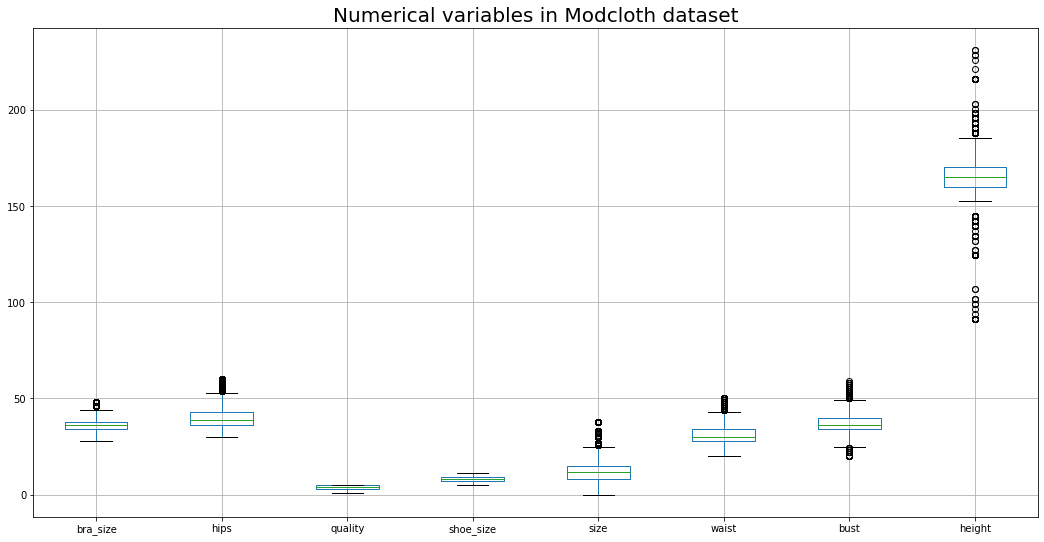

In [26]:
#11
#to check for the ouliers we plotted box plot
num_cols = ['bra_size','hips','quality','shoe_size','size','waist', 'bust', 'height', ]
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in Modcloth dataset", fontsize=20)
plt.show()

In [27]:
len(df)

82790

<ipython-input-28-936896cc8c0b>:3: RuntimeWarning: divide by zero encountered in log
  np.log(df[num_cols]).boxplot()


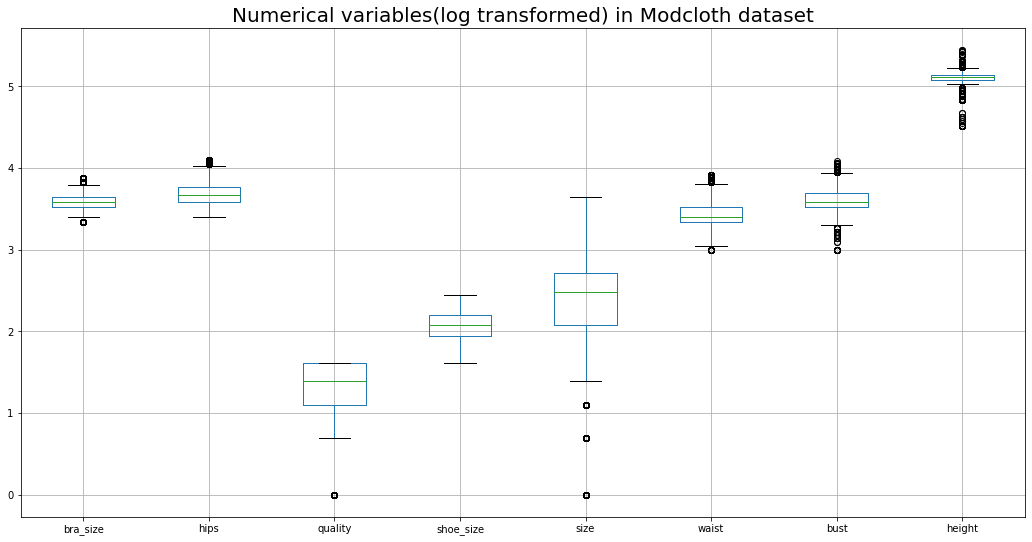

In [28]:
num_cols = ['bra_size','hips','quality','shoe_size','size','waist', 'bust', 'height', ]
plt.figure(figsize=(18,9))
np.log(df[num_cols]).boxplot()
plt.title("Numerical variables(log transformed) in Modcloth dataset", fontsize=20)
plt.show()

In [29]:
#12
#we dropped the rows in which the values are not in interquartile range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
Q1.drop(["item_id","user_id"], inplace =True)
Q3.drop(["item_id","user_id"], inplace = True)
IQR = Q3 - Q1

In [30]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [31]:
df.reset_index(drop=True, inplace=True)

In [32]:
len(df)

70361

# Feature Engineering

In [33]:
#13
#filling the missing values in cup_size and bra_size with unknown
df.cup_size.fillna("unknown", inplace = True)
df.bra_size.fillna("unknown", inplace = True)

In [34]:
df['category'].unique()

array(['new', 'dresses', 'wedding', 'sale', 'tops', 'bottoms',
       'outerwear'], dtype=object)

In [35]:
lingerie = (((df.bra_size != "unknown") | (df.cup_size != "unknown")) & df.height.isnull() & df.hips.isnull() & df.shoe_size.isnull() & df.shoe_width.isnull() & df.waist.isnull())

shoes = (((df.bra_size == "unknown") & (df.cup_size == "unknown")) & df.height.isnull() & df.hips.isnull() & (df.shoe_size.notnull() | df.shoe_width.notnull()) & df.waist.isnull())

dress = (((df.bra_size == "unknown") & (df.cup_size == "unknown")) & df.height.isnull() & (df.hips.notnull() | df.waist.notnull()) & df.shoe_size.isnull() & df.shoe_width.isnull())
 
df["first_time_user"] = (lingerie | shoes | dress)


In [36]:
#14
#First time buyer logic:
#if bra_size/cup_size and other columns null => first time lingerie
#if shoe_size/shoe_width and other columns null => first time shoes
#if hips/waist and other columns null => first time dress/tops

In [37]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text',
       'first_time_user'],
      dtype='object')

In [38]:
df.head()

item_id  waist  size  quality cup_size  hips bra_size category  bust  \
0   123373   29.0     7      5.0        d  38.0       34      new  36.0   
1   123373   31.0    13      3.0        b  30.0       36      new   NaN   
2   123373   30.0     7      2.0        b   NaN       32      new   NaN   
3   123373    NaN    21      5.0     dd/e   NaN  unknown      new   NaN   
4   123373    NaN    18      5.0        b   NaN       36      new   NaN   

   height         user_name         length    fit  user_id  shoe_size  \
0  167.64             Emily     just right  small   991571        NaN   
1  157.48  sydneybraden2001     just right  small   587883        NaN   
2  170.18             Ugggh  slightly long  small   395665        9.0   
3     NaN      alexmeyer626     just right    fit   875643        NaN   
4  157.48        dberrones1  slightly long  small   944840        NaN   

  shoe_width review_summary review_text  first_time_user  
0        NaN            NaN         NaN            False  
1        NaN            NaN         NaN            False  
2        NaN            NaN         NaN            False  
3        NaN            NaN         NaN             True  
4        NaN            NaN         NaN            False

In [39]:
len(df[df['first_time_user'] == True])

694

# Conversion

In [40]:
(sorted(df.hips.unique()))

[30.0,
 33.0,
 34.0,
 35.0,
 36.0,
 38.0,
 nan,
 31.0,
 32.0,
 37.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0]

In [41]:
#15
#in hips col the missing values are replaced with -1
df.hips = df.hips.fillna(-1.0)

In [42]:
labels = ['Unknown', 'XS', 'S', 'M', 'L', 'XL', 'Plus size']

In [43]:
bins = [-5, 0, 33, 37, 41, 45, 50, 61]

In [44]:
df.hips = pd.cut(df.hips, bins, labels = labels)

In [45]:
len(df[df['hips'] == 'Plus size'])

458

In [46]:
df['hips'].unique()
#

['M', 'XS', 'Unknown', 'L', 'XL', 'S', 'Plus size']
Categories (7, object): ['Unknown' < 'XS' < 'S' < 'M' < 'L' < 'XL' < 'Plus size']

# Cleaning

In [47]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text',
       'first_time_user'],
      dtype='object')

In [48]:
#16
#dropped some cols
df.drop(['bust', 'user_name', 'waist', 'review_text'],axis = 1, inplace = True)

In [49]:
len(df.columns)

15

In [50]:
df.review_summary.fillna("unknown", inplace = True)
df.shoe_size.fillna("unknown", inplace = True)
df.shoe_width.fillna("unknown", inplace = True)

<AxesSubplot:ylabel='Density'>

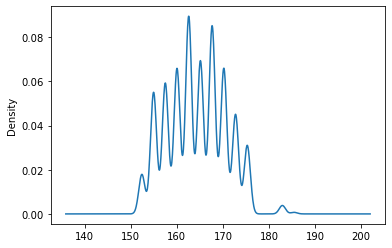

In [51]:
df.height.plot.kde()

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
#17
#transfoming missing values
median_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')

In [54]:
df[['height', 'quality']] = median_imputer.fit_transform(df[['height', 'quality']])

In [55]:
df['length'].value_counts()

just right        52745
slightly long      9505
slightly short     5438
very long          1981
very short          664
Name: length, dtype: int64

In [56]:
df["length"] = df.length.fillna(df['length'].value_counts().index[0])

In [57]:
df.isna().sum()

item_id            0
size               0
quality            0
cup_size           0
hips               0
bra_size           0
category           0
height             0
length             0
fit                0
user_id            0
shoe_size          0
shoe_width         0
review_summary     0
first_time_user    0
dtype: int64

In [58]:
df.shoe_size.unique()

array(['unknown', 9.0, 8.5, 7.0, 6.0, 8.0, 6.5, 10.0, 7.5, 9.5, 10.5, 5.5,
       11.5, 11.0, 5.0], dtype=object)

In [59]:
df.columns

Index(['item_id', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'height', 'length', 'fit', 'user_id', 'shoe_size',
       'shoe_width', 'review_summary', 'first_time_user'],
      dtype='object')

In [60]:
df.user_id.unique()

array([991571, 587883, 395665, ..., 197040, 102493,  78305], dtype=int64)

In [61]:
df[df['user_id'] == 991571]

item_id  size  quality cup_size hips bra_size category  height  \
0       123373     7      5.0        d    M       34      new  167.64   
15880   222123     8      5.0        d    M       34  dresses  167.64   
16268   268252     8      4.0        d    M       34     sale  167.64   

           length    fit  user_id shoe_size shoe_width       review_summary  \
0      just right  small   991571   unknown    unknown              unknown   
15880  just right    fit   991571   unknown    unknown     Amazing quality!   
16268  just right    fit   991571   unknown    unknown  A bit Addams Family   

       first_time_user  
0                False  
15880            False  
16268            False

# Testing and Training

In [62]:
le = LabelEncoder()

In [63]:
#df.info()

In [64]:
df['bra_size'] = df['bra_size'].replace(['unknown'], 0)
df['shoe_size'] = df['shoe_size'].replace(['unknown'], 0)

In [65]:
#18
#converting categorical to nummerical
df['cup_size'] = le.fit_transform(df['cup_size'])
df['hips'] = le.fit_transform(df['hips'])
#df['bra_size'] = le.fit_transform(df['bra_size'])
df['category'] = le.fit_transform(df['category'])
df['length'] = le.fit_transform(df['length'])
df['fit'] = le.fit_transform(df['fit'])
# df['shoe_size'] = le.fit_transform(df['shoe_size'])
# df['shoe_width'] = le.fit_transform(df['shoe_width'])


In [66]:
#df.head()

In [67]:
df.bra_size

0        34.0
1        36.0
2        32.0
3         0.0
4        36.0
         ... 
70356    36.0
70357    34.0
70358    32.0
70359     0.0
70360    32.0
Name: bra_size, Length: 70361, dtype: float64

In [68]:
df.columns

Index(['item_id', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'height', 'length', 'fit', 'user_id', 'shoe_size',
       'shoe_width', 'review_summary', 'first_time_user'],
      dtype='object')

In [69]:
# #19
# #features and target varibale
# X = df[['cup_size', 'bra_size', 'length', 'hips', 'height', 'first_time_user', 'shoe_size']].values
# #X = df[['bra_size', 'hips', 'height', 'shoe_size']].values
# Y = df['size'].values

In [70]:
# #20
# #70: 30 ratio
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y)#, test_size = 0.3

In [71]:
# rfc = RandomForestClassifier(n_estimators = 200)
# rfc.fit(X_train, Y_train)

In [72]:
# Y_pred = rfc.predict(X_test)

In [73]:
# accuracy_score(Y_test, Y_pred)

In [74]:
# lr = LogisticRegression()
# lr.fit(X_train,Y_train)
# Y_pred = lr.predict(X_test)
# accuracy_score(Y_test, Y_pred)

In [75]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [76]:
# pipe = make_pipeline(StandardScaler(), LogisticRegression())
# pipe.fit(X_train, y_train)

In [77]:
# pipe.score(X_test, y_test) 

In [78]:
a, b = train_test_split(df, test_size = 0.2)

In [79]:
import keras
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [80]:
df.columns

Index(['item_id', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'height', 'length', 'fit', 'user_id', 'shoe_size',
       'shoe_width', 'review_summary', 'first_time_user'],
      dtype='object')

In [81]:
X = preprocessing.scale(df[['cup_size', 'bra_size', 'length', 'hips', 'height',
             'first_time_user', 'shoe_size']].values.astype(np.float))
X[0]

array([-0.02573405,  0.13675661, -0.49984726, -1.0001574 ,  0.54081761,
       -0.09980819, -0.71515852])

In [82]:
Y = df['size'].values

In [97]:
le = LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
dummy_Y = np_utils.to_categorical(Y)
dummy_Y[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.], dtype=float32)

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, dummy_Y, test_size = 0.3)

In [99]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((49252, 7), (21109, 7), (49252, 22), (21109, 22))

In [100]:
def build_model():
    model = Sequential()
    model.add(Dense(64, input_dim=7, activation='relu'))
    model.add(Dense(64,  activation='relu'))
    model.add(Dense(22, activation = "softmax"))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [101]:
model = build_model()

In [102]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 22)                1430      
Total params: 6,102
Trainable params: 6,102
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 10, batch_size=8, verbose=2)

Epoch 1/10
6157/6157 - 12s - loss: 1.6545 - accuracy: 0.4233 - val_loss: 1.6144 - val_accuracy: 0.4403
Epoch 2/10
6157/6157 - 10s - loss: 1.5867 - accuracy: 0.4407 - val_loss: 1.5878 - val_accuracy: 0.4435
Epoch 3/10
6157/6157 - 10s - loss: 1.5752 - accuracy: 0.4422 - val_loss: 1.5775 - val_accuracy: 0.4467
Epoch 4/10
6157/6157 - 10s - loss: 1.5663 - accuracy: 0.4460 - val_loss: 1.5727 - val_accuracy: 0.4474
Epoch 5/10
6157/6157 - 10s - loss: 1.5621 - accuracy: 0.4475 - val_loss: 1.5789 - val_accuracy: 0.4457
Epoch 6/10
6157/6157 - 10s - loss: 1.5589 - accuracy: 0.4491 - val_loss: 1.5708 - val_accuracy: 0.4491
Epoch 7/10
6157/6157 - 11s - loss: 1.5551 - accuracy: 0.4495 - val_loss: 1.5646 - val_accuracy: 0.4537
Epoch 8/10
6157/6157 - 10s - loss: 1.5537 - accuracy: 0.4503 - val_loss: 1.5618 - val_accuracy: 0.4526
Epoch 9/10
6157/6157 - 11s - loss: 1.5508 - accuracy: 0.4507 - val_loss: 1.5614 - val_accuracy: 0.4510
Epoch 10/10
6157/6157 - 10s - loss: 1.5495 - accuracy: 0.4505 - val_loss:

In [104]:
y = model.predict([[-0.02573405,  0.13675661, -0.49984726, -1.0001574 ,  0.54081761,
       -0.09980819, -0.71515852]])
y

array([[1.0717791e-08, 2.3037998e-03, 4.5241873e-06, 2.2087063e-04,
        8.4756024e-02, 5.2778604e-03, 6.5465029e-03, 2.5052687e-02,
        4.7225374e-01, 2.3807019e-02, 2.1576565e-02, 9.5342556e-03,
        3.0648634e-01, 5.1225540e-03, 5.5522635e-03, 2.4464291e-02,
        1.0200107e-03, 3.0193065e-04, 5.6630173e-03, 3.3460026e-05,
        2.2340599e-05, 8.9797725e-11]], dtype=float32)